#Theoretical Questions

### 1. What is K-Nearest Neighbors (KNN) and how does it work?

**K-Nearest Neighbors (KNN)** is a simple, supervised machine learning algorithm that can be used for both classification and regression tasks. It is a non-parametric, instance-based learning algorithm.

**How it works:**
1.  **Storing Data:** KNN stores all available training data points.
2.  **Calculating Distance:** When a new, unseen data point (query point) needs to be classified or predicted, KNN calculates the distance between the query point and all the training data points. Common distance metrics include Euclidean distance, Manhattan distance, and Minkowski distance.
3.  **Finding Neighbors:** It then identifies the 'K' nearest training data points to the query point, where 'K' is a user-defined integer.
4.  **Making a Prediction:**
    * **For Classification:** The algorithm assigns the query point to the class that is most common among its K nearest neighbors (majority vote).
    * **For Regression:** The algorithm predicts the value for the query point by averaging the values of its K nearest neighbors.

---

### 2. What is the difference between KNN Classification and KNN Regression?

The fundamental mechanism of finding the K nearest neighbors is the same for both KNN Classification and KNN Regression. The difference lies in how the final prediction is made based on those neighbors:

* **KNN Classification:**
    * **Goal:** To assign a class label to a new data point.
    * **Prediction Method:** The new data point is assigned the class label that is most frequent among its K nearest neighbors. For example, if K=5 and 3 neighbors are Class A and 2 neighbors are Class B, the new point is classified as Class A.
    * **Output:** A discrete class label.

* **KNN Regression:**
    * **Goal:** To predict a continuous value for a new data point.
    * **Prediction Method:** The predicted value for the new data point is typically the average (or sometimes the median) of the values of its K nearest neighbors.
    * **Output:** A continuous numerical value.

---

### 3. What is the role of the distance metric in KNN?

The distance metric is a crucial component of the KNN algorithm. Its role is to quantify the similarity (or dissimilarity) between data points. The choice of distance metric can significantly impact the performance of KNN.

* **Quantifying Similarity:** It determines how "close" or "far apart" two data points are in the feature space.
* **Neighbor Identification:** Based on these calculated distances, the algorithm identifies the K nearest neighbors to a new data point.
* **Impact on Performance:** Different distance metrics can lead to different sets of neighbors and, consequently, different predictions. The optimal distance metric often depends on the nature of the data.

Common distance metrics include:
* **Euclidean Distance:** The most common, representing the straight-line distance between two points in Euclidean space. Suitable for continuous variables.
    $$d(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}$$
* **Manhattan Distance:** Calculates the distance as the sum of the absolute differences of their Cartesian coordinates. Useful when features are not necessarily comparable or have different units.
    $$d(p, q) = \sum_{i=1}^{n} |p_i - q_i|$$
* **Minkowski Distance:** A generalization of both Euclidean and Manhattan distances.
    $$d(p, q) = \left(\sum_{i=1}^{n} |p_i - q_i|^p\right)^{1/p}$$
    * When $p=1$, it is Manhattan distance.
    * When $p=2$, it is Euclidean distance.
* **Hamming Distance:** Used for categorical variables, counting the number of positions at which the corresponding symbols are different.

---

### 4. What is the Curse of Dimensionality in KNN?

The **Curse of Dimensionality** refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces (i.e., datasets with many features) that do not occur in low-dimensional settings. In the context of KNN, it has several negative impacts:

* **Increased Sparsity:** As the number of dimensions increases, the data points become sparser. The volume of the feature space increases exponentially, so you need exponentially more data to maintain the same density of points.
* **Distance Metrics Become Less Useful:** In high dimensions, the distance between any two points tends to become more uniform. The concept of "nearest" and "farthest" neighbors becomes less meaningful because points are often almost equidistant from each other. This makes it difficult to find truly "close" neighbors.
* **Increased Computational Cost:** Calculating distances between points becomes more computationally expensive as the number of dimensions increases.
* **Overfitting:** With many features, there's a higher chance that KNN will find spurious correlations in the training data, leading to poor generalization on unseen data.
* **Irrelevant Features:** High-dimensional data often contains irrelevant features that can mislead the distance calculations, diluting the effect of truly important features.

To mitigate the curse of dimensionality, techniques like dimensionality reduction (e.g., PCA) or feature selection are often applied before using KNN.

---

### 5. How can we choose the best value of K in KNN?

Choosing the optimal value of 'K' is critical for the performance of the KNN algorithm. A small 'K' can make the model sensitive to noise (high variance, low bias), while a large 'K' can make the decision boundary overly smooth and might misclassify points (high bias, low variance).

Here are common methods to choose the best value of K:

* **Rule of Thumb:**
    * $K = \sqrt{N}$, where N is the number of samples in the training dataset. This is a starting point but not always optimal.
    * K should be an odd number for binary classification to avoid ties (though ties can be broken randomly or by other rules).

* **Cross-Validation:** This is the most robust method.
    * **K-Fold Cross-Validation:** The training data is split into 'k' folds. For each potential value of K (for KNN), the model is trained on k-1 folds and validated on the remaining fold. This process is repeated 'k' times, with each fold serving as the validation set once. The average performance (e.g., accuracy for classification, RMSE for regression) across the folds is calculated for each K.
    * The value of K (for KNN) that yields the best average performance is selected.
    * Common choices for the number of folds are 5 or 10.

* **Elbow Method (for classification accuracy or error rate):**
    * Plot the accuracy (or error rate) for different values of K (e.g., from 1 to a certain maximum).
    * For accuracy, look for the K value where the accuracy starts to saturate or peak.
    * For error rate, look for an "elbow" point where the error rate significantly decreases and then starts to flatten out or even increase. The K at this elbow is often a good choice.

* **Domain Knowledge:** Sometimes, understanding the problem domain can provide insights into a suitable range for K.

It's generally recommended to test a range of K values (e.g., 1, 3, 5, ..., up to a reasonable limit like 20 or 30, or $\sqrt{N}$).

---

### 6. What are KD Tree and Ball Tree in KNN?

KD Tree and Ball Tree are tree-based data structures used to optimize the process of finding the K nearest neighbors, especially in lower-dimensional spaces (for KD Trees) or when data has a certain structure. They help avoid the computationally expensive brute-force search where distances to all training points are calculated.

* **KD Tree (K-Dimensional Tree):**
    * **Structure:** A binary tree that recursively partitions the feature space. At each node, the space is split along one dimension, typically by choosing the median of the data points along that dimension. The splitting dimension often cycles through the available dimensions.
    * **Querying:** When searching for neighbors, the tree is traversed. Branches that cannot possibly contain a nearest neighbor (based on the current best distance found and the boundaries of the node's region) are pruned, significantly speeding up the search.
    * **Effectiveness:** Works well for low to moderate dimensions (e.g., up to around 20 dimensions). Its performance degrades in very high dimensions due to the curse of dimensionality (it may not prune effectively and could devolve into a near brute-force search).

* **Ball Tree:**
    * **Structure:** A tree data structure where each node defines a hypersphere (or "ball") that encloses a subset of the data points. Internal nodes have larger balls that encompass the balls of their children. Leaf nodes contain the actual data points.
    * **Querying:** Similar to KD Trees, the search traverses the tree. If a query point is too far from the center of a node's ball (plus its radius) compared to the current Kth nearest neighbor, that entire ball (and all points within it) can be pruned.
    * **Effectiveness:** Generally more effective than KD Trees in higher dimensions, especially when data points are clustered. They are less sensitive to the distribution of data compared to KD trees, which rely on axis-aligned splits. The construction of Ball Trees can be more computationally intensive than KD Trees.

Both aim to reduce the number of distance calculations needed, making KNN faster for large datasets.

---

### 7. When should you use KD Tree vs. Ball Tree?

The choice between KD Tree and Ball Tree for optimizing KNN search depends on several factors, primarily the dimensionality of the data and its structure:

* **KD Tree:**
    * **Best for:** Low to moderate dimensional data (e.g., $D < 20$).
    * **Advantages:** Generally faster to build and can be very efficient for search in lower dimensions.
    * **Disadvantages:** Performance degrades significantly in high dimensions. If data is not well-structured for axis-aligned splits, its efficiency can suffer.

* **Ball Tree:**
    * **Best for:** Higher dimensional data (e.g., $D > 20$) where KD Trees start to perform poorly. Also good for data that is clustered or has some inherent structure that can be captured by hyperspheres.
    * **Advantages:** More robust to high dimensionality compared to KD Trees. Can be more efficient if the data forms natural clusters. The choice of distance metric can be more flexible.
    * **Disadvantages:** Can be slower to build than KD Trees. The overhead of the tree structure might make it slower than brute-force for very small datasets or very high dimensions where even Ball Trees become inefficient.

**General Guidelines:**

* **Low Dimensions ($D \lesssim 20$):** KD Tree is often preferred due to its faster build time and query speed.
* **Moderate to High Dimensions ($D \gtrsim 20$):** Ball Tree tends to be more effective.
* **Very High Dimensions:** Both KD Trees and Ball Trees can become inefficient, and approximate nearest neighbor (ANN) algorithms or even brute-force (if the dataset is small enough) might be considered. Dimensionality reduction could also be essential.
* **Dataset Size:** For very small datasets, the overhead of building these trees might outweigh the benefits, and a brute-force search could be faster.
* **Data Structure:** If data is known to be clustered, Ball Trees might have an advantage.

Most modern KNN implementations (like scikit-learn's `KNeighborsClassifier` or `KNeighborsRegressor`) have an `algorithm` parameter that can be set to `'kd_tree'`, `'ball_tree'`, or `'auto'`. The `'auto'` option typically tries to determine the best algorithm based on the input data.

---

### 8. What are the disadvantages of KNN?

While KNN is simple and intuitive, it has several disadvantages:

* **Computationally Expensive for Prediction:** KNN is an instance-based learner, meaning it stores the entire training dataset. For each new prediction, it needs to calculate distances to all training points (or traverse a tree structure, which still has overhead). This can be slow for large datasets.
* **High Memory Requirement:** Storing the entire training dataset can require significant memory, especially for large N (number of samples) and M (number of features).
* **Sensitivity to Feature Scaling:** KNN relies on distance metrics. Features with larger scales can dominate the distance calculation, leading to biased results. Therefore, feature scaling (like normalization or standardization) is usually crucial.
* **Curse of Dimensionality:** Performance degrades significantly as the number of features increases. Distance metrics become less meaningful in high-dimensional spaces.
* **Sensitive to Irrelevant Features:** Irrelevant or redundant features can negatively impact the accuracy by misleading the distance calculations. Feature selection or dimensionality reduction is often needed.
* **Choosing the Right K:** The performance of KNN is highly dependent on the choice of 'K'. Finding the optimal K often requires experimentation and cross-validation.
* **No Explicit Training Phase (or very fast "training"):** While this can be seen as an advantage (lazy learner), it means all the computational work happens during the prediction phase.
* **Imbalanced Data:** In classification, if one class is much more frequent than others, it can dominate the majority vote, leading to poor predictions for minority classes, especially with smaller K values.
* **Can be Sensitive to Outliers:** Outliers can significantly affect the choice of nearest neighbors and thus the prediction, especially for small K.

---

### 9. How does feature scaling affect KNN?

Feature scaling significantly affects the KNN algorithm because KNN relies on distance metrics (like Euclidean distance) to determine the "nearness" of data points.

* **Impact of Unscaled Features:**
    * If features are on different scales (e.g., one feature ranges from 0-1, another from 0-1000), the feature with the larger range and values will dominate the distance calculation.
    * For example, in Euclidean distance $d = \sqrt{(x_1-y_1)^2 + (x_2-y_2)^2}$, if feature 1 has a much larger scale than feature 2, the term $(x_1-y_1)^2$ will contribute much more to the total distance, effectively making feature 2 less important in determining neighbors.
    * This can lead to suboptimal performance as the algorithm might not consider the true relationships between data points based on all features equally.

* **Benefits of Feature Scaling:**
    * **Equal Contribution:** Scaling brings all features to a similar range, ensuring that each feature contributes more proportionally to the distance calculation.
    * **Improved Performance:** This often leads to a more accurate and robust KNN model because the "nearness" is determined more fairly across all dimensions.
    * **Faster Convergence (for tree-based KNN):** While KNN itself doesn't have a convergence phase in the typical sense, if tree-based optimizers (KD-Tree, Ball-Tree) are used, more balanced feature scales can sometimes help in building more effective tree structures.

**Common Scaling Techniques:**

* **Standardization (Z-score normalization):** Transforms data to have a mean of 0 and a standard deviation of 1.
    $$X_{scaled} = \frac{X - \mu}{\sigma}$$
    where $\mu$ is the mean and $\sigma$ is the standard deviation.
* **Min-Max Scaling (Normalization):** Rescales features to a specific range, usually [0, 1] or [-1, 1].
    $$X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

**When to Scale:** It is almost always recommended to perform feature scaling before applying the KNN algorithm, unless all features are already on a comparable scale or there's a specific domain reason not to. The scaling parameters (e.g., mean and standard deviation for standardization, or min and max for min-max scaling) should be learned from the training data only and then applied to both the training and test/new data to prevent data leakage.

---

### 10. What is PCA (Principal Component Analysis)?

**Principal Component Analysis (PCA)** is a widely used unsupervised dimensionality reduction technique. Its main goal is to transform a dataset with many variables (features) into a smaller set of new variables, called **principal components (PCs)**, while retaining most of the original information (variance) in the data.

Key characteristics:
* **Dimensionality Reduction:** Reduces the number of features, which can help in simplifying models, reducing computational cost, and mitigating the curse of dimensionality.
* **Feature Extraction:** Creates new features (principal components) that are linear combinations of the original features. These PCs are orthogonal (uncorrelated) to each other.
* **Variance Maximization:** The first principal component ($PC_1$) is chosen to capture the largest possible variance in the dataset. The second principal component ($PC_2$) is chosen to capture the largest remaining variance while being orthogonal to $PC_1$, and so on.
* **Unsupervised:** It does not use any class labels or target variables; it only looks at the relationships between the input features.

PCA is often used for data compression, noise reduction, feature extraction for supervised learning algorithms, and data visualization (by projecting data onto 2 or 3 principal components).

---

### 11. How does PCA work?

PCA works by finding a new set of orthogonal axes (principal components) in the direction of maximum variance in the data. Here's a step-by-step breakdown:

1.  **Standardize the Data (Optional but Recommended):**
    * PCA is sensitive to the scales of the features. If features have vastly different scales, features with larger variances will dominate the principal components.
    * Standardize each feature to have zero mean and unit variance.
    $$X_{scaled} = \frac{X - \mu}{\sigma}$$

2.  **Compute the Covariance Matrix (or Correlation Matrix):**
    * The covariance matrix captures the variance of each feature and the covariance between pairs of features.
    * If the data was standardized, the covariance matrix is equivalent to the correlation matrix.
    * For a dataset with $d$ features, the covariance matrix $\Sigma$ will be a $d \times d$ matrix.
    $$\Sigma = \frac{1}{n-1} X_{scaled}^T X_{scaled}$$
    (where $n$ is the number of samples)

3.  **Compute Eigenvalues and Eigenvectors of the Covariance Matrix:**
    * Solve the eigenvalue equation: $\Sigma v = \lambda v$
        * $v$ are the eigenvectors.
        * $\lambda$ are the corresponding eigenvalues.
    * The eigenvectors represent the directions of the principal components.
    * The eigenvalues represent the amount of variance captured by each corresponding eigenvector (principal component).

4.  **Sort Eigenvalues and Eigenvectors:**
    * Sort the eigenvalues in descending order.
    * Rearrange the corresponding eigenvectors according to the sorted eigenvalues. The eigenvector with the largest eigenvalue is the first principal component ($PC_1$), the one with the second-largest eigenvalue is the second principal component ($PC_2$), and so on.

5.  **Select Principal Components:**
    * Decide how many principal components to keep (k). This can be based on:
        * A predefined number of dimensions.
        * The proportion of variance explained (e.g., keep enough PCs to explain 95% of the total variance).
        * Scree plot: Plot eigenvalues and look for an "elbow" point.
    * Select the top 'k' eigenvectors corresponding to the 'k' largest eigenvalues. These form the projection matrix $W$ (a $d \times k$ matrix).

6.  **Transform the Data (Project onto the New Feature Space):**
    * Project the original standardized data ($X_{scaled}$) onto the selected principal components to obtain the new lower-dimensional dataset ($Z$).
    $$Z = X_{scaled} W$$
    The resulting dataset $Z$ will have $n$ samples and $k$ features (the principal components).

---

### 12. What is the geometric intuition behind PCA?

Geometrically, PCA can be understood as a process of finding a new coordinate system for the data.

* **Rotation of Axes:** PCA rotates the original coordinate axes to a new set of orthogonal axes, called principal components.
* **Directions of Maximum Variance:**
    * The **first principal component ($PC_1$)** is the direction in the feature space along which the data varies the most (has the maximum variance). If you were to project all data points onto this single line, the spread of these projected points would be maximized.
    * The **second principal component ($PC_2$)** is the direction, orthogonal (perpendicular) to $PC_1$, along which the data has the next highest variance.
    * This continues for subsequent principal components, each being orthogonal to all previous ones and capturing the maximum remaining variance.
* **Projection:** After identifying these principal axes, PCA projects the original data points onto the subspace defined by the selected number of principal components (typically the first few that capture most of the variance). This projection effectively reduces the dimensionality of the data while trying to preserve the most important structure.
* **Best Fit Subspace:** PCA finds the lower-dimensional subspace (e.g., a line if $k=1$, a plane if $k=2$) that best fits the data in a least-squares sense. This means it minimizes the sum of squared distances from each data point to its projection onto the subspace.
* **Data Ellipsoid:** If you imagine the data cloud as an ellipsoid, the principal components are the axes of this ellipsoid. The longest axis is $PC_1$, the next longest (orthogonal to $PC_1$) is $PC_2$, and so on. PCA essentially aligns the new coordinate system with these axes.

In essence, PCA identifies the directions of greatest "spread" or "information" in the data and reorients the data along these directions, allowing us to discard dimensions with less spread (less information) with minimal loss of the overall data structure.

---

### 13. What is the difference between Feature Selection and Feature Extraction?

Both feature selection and feature extraction are techniques used for dimensionality reduction, aiming to improve model performance, reduce computational cost, and avoid overfitting. However, they achieve this goal in different ways:

* **Feature Selection:**
    * **Goal:** To select a subset of the original features.
    * **Process:** It evaluates the importance or relevance of each original feature and keeps only the most useful ones, discarding the rest.
    * **Output:** A subset of the original features. The selected features retain their original meaning and interpretation.
    * **Methods:**
        * **Filter methods:** Evaluate features based on intrinsic properties like correlation with the target, mutual information, variance (e.g., Chi-squared test, ANOVA F-value, variance thresholding).
        * **Wrapper methods:** Use a specific machine learning model to evaluate subsets of features. The model's performance is used as the criterion for selecting the best subset (e.g., Recursive Feature Elimination (RFE), forward selection, backward elimination).
        * **Embedded methods:** Feature selection is performed as part of the model training process (e.g., L1 regularization like Lasso, decision tree feature importance).
    * **Pros:** Preserves original feature interpretability, can remove irrelevant and redundant features.
    * **Cons:** May miss useful interactions between features if they are individually weak but collectively strong. The search for the optimal subset can be computationally intensive for wrapper methods.

* **Feature Extraction:**
    * **Goal:** To create a new, smaller set of features by transforming or combining the original features.
    * **Process:** It derives new features from the original ones. These new features are combinations or projections of the original features.
    * **Output:** A new set of transformed features. These new features may not have a direct, clear interpretation in terms of the original features.
    * **Methods:**
        * **Principal Component Analysis (PCA):** Creates uncorrelated principal components that capture maximum variance.
        * **Linear Discriminant Analysis (LDA):** Creates features that maximize class separability (supervised).
        * **t-SNE (t-distributed Stochastic Neighbor Embedding):** For visualization in low dimensions, focuses on preserving local structure.
        * **Autoencoders:** Neural networks trained to reconstruct the input, with a bottleneck layer representing the extracted features.
    * **Pros:** Can capture complex relationships and interactions between original features. Can be more effective in reducing dimensionality when features are highly correlated or when a dense representation is needed.
    * **Cons:** The new features are often less interpretable than the original ones. Information loss is inevitable, though methods aim to minimize it.

**Key Differences Summarized:**

| Feature           | Feature Selection                      | Feature Extraction                        |
| :---------------- | :------------------------------------- | :---------------------------------------- |
| **Approach** | Chooses a subset of original features  | Creates new features from originals       |
| **Output Features** | Original features                      | Transformed features (new)                |
| **Interpretability**| High (retains original meaning)      | Often low (new features are combinations) |
| **Information** | Discards information from some features| Transforms/compresses information         |
| **Example** | Removing a column from a table       | PCA creating principal components         |

Both techniques can be used in conjunction. For instance, one might first use feature extraction to reduce high dimensionality and then apply feature selection on the extracted components if needed, or vice-versa.

---

### 14. What are Eigenvalues and Eigenvectors in PCA?

In the context of Principal Component Analysis (PCA), eigenvalues and eigenvectors are derived from the covariance matrix (or correlation matrix) of the dataset. They are fundamental to identifying the principal components.

* **Covariance Matrix ($\Sigma$):** This $d \times d$ matrix (where $d$ is the number of original features) describes the variance of each feature and the covariance between pairs of features.

* **Eigenvectors ($v$):**
    * **Definition:** An eigenvector of the covariance matrix represents a direction in the feature space. When the data is projected onto this direction, the direction of the vector does not change; it is only scaled.
    * **In PCA:** The eigenvectors of the covariance matrix are the **principal components**. They define the new set of orthogonal axes in the feature space.
    * **Properties:**
        * They are orthogonal to each other (if the eigenvalues are distinct). This means the principal components are uncorrelated.
        * Each eigenvector has a corresponding eigenvalue.
        * The eigenvector with the largest eigenvalue corresponds to the first principal component ($PC_1$), which is the direction of maximum variance in the data. The eigenvector with the second largest eigenvalue is $PC_2$, and so on.

* **Eigenvalues ($\lambda$):**
    * **Definition:** An eigenvalue is a scalar that indicates how much variance in the data is explained by its corresponding eigenvector (principal component).
    * **In PCA:** The eigenvalue associated with an eigenvector tells us the amount of variance captured along that principal component's direction.
    * **Properties:**
        * Larger eigenvalues correspond to principal components that capture more variance.
        * The sum of all eigenvalues is equal to the total variance in the dataset (if using the covariance matrix based on standardized data, this sum equals the number of features).
        * Eigenvalues are always non-negative.

**Mathematical Relationship:**
They are found by solving the equation:
$$\Sigma v = \lambda v$$
Where:
* $\Sigma$ is the covariance matrix.
* $v$ is an eigenvector.
* $\lambda$ is the corresponding eigenvalue.

This equation means that when the covariance matrix $\Sigma$ (which represents a linear transformation) acts on an eigenvector $v$, the result is the same eigenvector $v$ scaled by the eigenvalue $\lambda$. The eigenvectors are the directions that are only stretched or shrunk by the transformation, not rotated.

In summary, eigenvectors define the directions of the new axes (principal components), and eigenvalues quantify the importance of these directions by measuring the variance along them. PCA uses this information to select the most important directions for dimensionality reduction.

---

### 15. How do you decide the number of components to keep in PCA?

Deciding the number of principal components (k) to keep is a critical step in PCA, as it involves a trade-off between dimensionality reduction and information loss. Here are several common methods:

1.  **Percentage of Variance Explained:**
    * **Concept:** Keep enough principal components to explain a certain percentage of the total variance in the data. Common thresholds are 90%, 95%, or 99%.
    * **How to calculate:**
        1.  Calculate all eigenvalues ($\lambda_1, \lambda_2, ..., \lambda_d$).
        2.  Sort them in descending order.
        3.  The proportion of variance explained by the $i^{th}$ principal component is $\frac{\lambda_i}{\sum_{j=1}^{d} \lambda_j}$.
        4.  The cumulative variance explained by the top $k$ components is $\frac{\sum_{i=1}^{k} \lambda_i}{\sum_{j=1}^{d} \lambda_j}$.
        5.  Choose the smallest $k$ such that this cumulative variance exceeds your desired threshold.
    * **Pros:** Intuitive and allows direct control over information retention.
    * **Cons:** The chosen threshold can be somewhat arbitrary.

2.  **Scree Plot:**
    * **Concept:** Plot the eigenvalues (sorted in descending order) against the component number.
    * **How to interpret:** Look for an "elbow" or a point where the eigenvalues start to level off. The components before this elbow are considered the most significant. The idea is that components after the elbow contribute much less to the variance.
    * **Pros:** Visual and relatively easy to interpret.
    * **Cons:** The "elbow" point can be subjective and not always clearly defined.

3.  **Kaiser's Rule (Eigenvalue > 1):**
    * **Concept:** Keep only those principal components whose eigenvalues are greater than 1.
    * **Rationale:** This rule typically applies when PCA is performed on a correlation matrix (where variables are standardized). An eigenvalue of 1 means that the principal component explains as much variance as one of the original standardized variables. Components with eigenvalues less than 1 are considered to explain less variance than a single original variable.
    * **Pros:** Simple and objective.
    * **Cons:** Can be too strict or too lenient depending on the dataset. More of a heuristic.

4.  **Fixed Number of Components:**
    * **Concept:** Based on domain knowledge or specific application requirements (e.g., for visualization, you might choose $k=2$ or $k=3$).
    * **Pros:** Simple if there's a clear external constraint.
    * **Cons:** May not be optimal in terms of variance explained.

5.  **Cross-Validation:**
    * **Concept:** If PCA is used as a preprocessing step for a supervised learning model, you can treat the number of components as a hyperparameter and tune it using cross-validation.
    * **How to do it:** For different values of $k$, perform PCA, train the downstream model, and evaluate its performance on a validation set. Choose the $k$ that results in the best model performance.
    * **Pros:** Directly optimizes for the performance of the ultimate task.
    * **Cons:** Can be computationally expensive.

**Practical Approach:**
Often, a combination of these methods is used. For example:
* Start with a scree plot and percentage of variance explained to get an idea of a reasonable range for $k$.
* If PCA is for a supervised task, confirm the choice with cross-validation if feasible.

The "best" number of components depends heavily on the specific dataset and the goals of the analysis.

---

### 16. Can PCA be used for classification?

PCA itself is an **unsupervised** dimensionality reduction technique, meaning it does not use class labels when finding principal components. Its primary goal is to capture the directions of maximum variance in the data, not necessarily to find directions that best separate classes.

However, PCA can be **used as a preprocessing step for a classification task** in several ways:

1.  **Dimensionality Reduction:**
    * By reducing the number of features, PCA can make subsequent classification algorithms faster and less prone to overfitting, especially when the original number of features is very high (curse of dimensionality).
    * It can help remove noise by focusing on the components with the most variance.

2.  **Visualization:**
    * By projecting the data onto the first 2 or 3 principal components, PCA can help visualize the data and potentially reveal clusters or separability that might be useful for classification.

3.  **Improving Classifier Performance:**
    * Sometimes, removing less important components or noise can lead to better generalization performance for the classifier.
    * It can also help with multicollinearity issues, as principal components are orthogonal.

**Limitations of using PCA for Classification:**

* **Information Loss relevant to Classification:** The directions of maximum variance (found by PCA) may not always align with the directions that provide the best class separability. PCA might discard components that have low variance but are crucial for distinguishing between classes.
* **Supervised Alternatives:** For dimensionality reduction specifically aimed at classification, supervised techniques like Linear Discriminant Analysis (LDA) are often more effective. LDA explicitly tries to find a lower-dimensional subspace that maximizes the separability between classes.

**How to use PCA with a classifier:**

1.  Split your data into training and testing sets.
2.  Fit PCA **only on the training data** to learn the principal components (and any scaling parameters).
3.  Transform both the training data and the testing data using the **fitted** PCA model.
4.  Train your classifier on the transformed training data.
5.  Evaluate the classifier on the transformed testing data.

In summary, PCA is not a classifier itself, but it can be a useful tool in a classification pipeline, primarily for dimensionality reduction and sometimes for improving performance by reducing noise or multicollinearity. Its effectiveness for a specific classification task needs to be evaluated empirically.

---

### 17. What are the limitations of PCA?

While PCA is a powerful and widely used technique, it has several limitations:

1.  **Assumes Linearity:** PCA is based on linear combinations of features. It assumes that the principal components are linear transformations of the original variables. If the underlying structure of the data is highly non-linear, PCA may not be able to capture it effectively. Non-linear dimensionality reduction techniques (e.g., Kernel PCA, t-SNE, UMAP, Autoencoders) might be more suitable in such cases.

2.  **Sensitivity to Data Scaling:** PCA is sensitive to the scale of the input features. If features are not scaled (e.g., standardized to have zero mean and unit variance), features with larger variances will dominate the principal components, potentially leading to misleading results.

3.  **Maximizes Variance, Not Necessarily Class Separability or Predictive Power:** PCA aims to find directions of maximum variance. These directions may not always align with the directions that are most useful for a specific supervised learning task (like classification or regression). Components with low variance that are discarded might contain important information for prediction.

4.  **Interpretability of Principal Components:** The principal components are linear combinations of the original features. While the first few components capture the most variance, they can sometimes be difficult to interpret in terms of the original problem domain, as they mix multiple original features.

5.  **Information Loss:** Dimensionality reduction inevitably involves some loss of information. While PCA tries to minimize this by preserving as much variance as possible, the discarded components might still contain useful details.

6.  **Assumption of Orthogonality:** PCA finds orthogonal principal components. While this ensures that the components are uncorrelated, real-world data structures may not always be best represented by orthogonal axes.

7.  **Data Distribution Assumptions (Implicit):** Although PCA doesn't make strong explicit distributional assumptions for its mathematical derivation (like normality for finding components), its effectiveness in capturing meaningful structure can be influenced by the data distribution. For example, if data has distinct, non-Gaussian clusters, PCA might not be the best tool to separate them. Some interpretations (like PCs representing axes of an ellipsoid) are more fitting for data that is somewhat elliptically distributed.

8.  **Sensitive to Outliers:** Outliers can heavily influence the calculation of the covariance matrix and thus the directions of the principal components. A few extreme outliers can skew the components. Robust versions of PCA exist to address this.

9.  **Need to Choose the Number of Components:** Deciding how many principal components to retain is not always straightforward and often requires heuristics (like scree plots, percentage of variance) or cross-validation.

Despite these limitations, PCA remains a valuable tool for exploratory data analysis, dimensionality reduction, noise reduction, and as a preprocessing step for other machine learning algorithms. Understanding its limitations helps in choosing when and how to apply it effectively.

---

### 18. How do KNN and PCA complement each other?

K-Nearest Neighbors (KNN) and Principal Component Analysis (PCA) can complement each other effectively, especially when dealing with high-dimensional datasets. PCA is often used as a preprocessing step before applying KNN. Here's how they complement each other:

1.  **Combating the Curse of Dimensionality for KNN:**
    * **KNN's Weakness:** KNN suffers from the curse of dimensionality. In high dimensions, distance metrics become less meaningful, data becomes sparse, and computational costs increase.
    * **PCA's Role:** PCA can reduce the dimensionality of the feature space by transforming the original features into a smaller set of principal components that retain most of the variance.
    * **Benefit:** Applying KNN on this lower-dimensional data (the principal components) can lead to improved performance, faster computation, and more robust results because the distance calculations are done in a more condensed and potentially less noisy space.

2.  **Reducing Noise for KNN:**
    * **KNN's Weakness:** KNN can be sensitive to noisy data and irrelevant features, as these can distort the distance calculations and lead to incorrect neighbor selection.
    * **PCA's Role:** PCA tends to capture the primary sources of variation in the data in its first few components, often pushing noise into the later components with less variance. By discarding these later components, PCA can act as a denoising mechanism.
    * **Benefit:** KNN applied to the PCA-transformed data (using only the top components) may be less affected by noise, leading to more accurate predictions.

3.  **Improving Computational Efficiency of KNN:**
    * **KNN's Weakness:** The prediction phase of KNN can be computationally expensive for datasets with many features because it involves calculating distances in a high-dimensional space.
    * **PCA's Role:** By reducing the number of features, PCA significantly reduces the dimensionality in which these distance calculations are performed.
    * **Benefit:** This makes the KNN algorithm run faster, especially when using brute-force neighbor search or even when using tree-based structures (as tree construction and search are also generally faster in lower dimensions).

4.  **Handling Multicollinearity for KNN:**
    * **KNN's Weakness:** While not as directly affected by multicollinearity as some parametric models, highly correlated features can give disproportionate weight to the underlying information they represent in distance calculations.
    * **PCA's Role:** PCA transforms correlated features into a set of uncorrelated principal components.
    * **Benefit:** This can sometimes lead to a more balanced consideration of the underlying data patterns by KNN.

**Workflow:**

1.  **Prepare Data:** Split data into training and test sets.
2.  **Apply PCA (on training data):**
    * Standardize the training data.
    * Fit PCA on the standardized training data and select the desired number of principal components.
    * Transform both the standardized training data and the standardized test data using the *fitted* PCA model.
3.  **Apply KNN:**
    * Train the KNN model using the PCA-transformed training data.
    * Make predictions on the PCA-transformed test data.

**Considerations:**

* **Information Loss:** PCA involves information loss. It's crucial to choose the number of components carefully to retain enough variance relevant to the KNN task.
* **Not Always Better:** Using PCA doesn't always guarantee improved KNN performance. If the discarded components (those with low variance) contain critical information for discriminating between classes or predicting values, KNN performance might degrade. The effectiveness should be empirically validated.
* **Supervised Alternatives:** If the goal is dimensionality reduction for a classification task, supervised methods like LDA might be more suitable than PCA, as LDA explicitly aims to maximize class separability.

In essence, PCA can address some of KNN's key weaknesses related to high dimensionality and computational cost, making KNN a more viable and effective algorithm for certain types of datasets.

---

### 19. How does KNN handle missing values in a dataset?

The standard K-Nearest Neighbors (KNN) algorithm **cannot directly handle missing values**. This is because its core mechanism relies on calculating distances between data points. If a feature value is missing for a point, the distance to other points cannot be computed for that feature, and thus the overall distance is undefined.

Therefore, missing values must be dealt with **before** applying the KNN algorithm. Here are common strategies:

1.  **Deletion:**
    * **Listwise Deletion (Row Deletion):** Remove entire data points (rows) that contain any missing values.
        * *Pros:* Simple.
        * *Cons:* Can lead to significant loss of data if many rows have missing values or if missing values are not randomly distributed, potentially introducing bias.
    * **Pairwise Deletion (Column Deletion if a feature has too many missing values):** If a particular feature (column) has a very high percentage of missing values, it might be dropped entirely.
        * *Pros:* Can remove uninformative features.
        * *Cons:* Loses all information from that feature.

2.  **Imputation (Filling in Missing Values):** This is generally the preferred approach.
    * **Mean/Median/Mode Imputation:**
        * Replace missing numerical values with the mean or median of the observed values for that feature.
        * Replace missing categorical values with the mode (most frequent category) of the observed values for that feature.
        * *Pros:* Simple, fast.
        * *Cons:* Reduces variance, distorts correlations between variables, ignores relationships between features. Median is more robust to outliers than mean.
    * **Constant Value Imputation:** Replace missing values with a specific constant (e.g., 0, -1, or a value like "Missing"). This can sometimes allow the model to learn if "missingness" itself is informative.
        * *Pros:* Simple.
        * *Cons:* The choice of constant is arbitrary and can affect model performance.
    * **Regression Imputation:** Use regression models (e.g., linear regression) to predict the missing value based on other features.
        * *Pros:* Can provide more accurate imputations by considering relationships between variables.
        * *Cons:* More complex, assumes linear relationships (for linear regression), can be computationally intensive. The imputed values are predictions and have uncertainty.
    * **K-Nearest Neighbors Imputation (KNN Imputer):** This is a clever approach where KNN itself is used to impute missing values.
        * For a data point with a missing value in a feature, find the K nearest neighbors based on the *other* available features (features without missing values for that point).
        * The missing value is then imputed using the average (for numerical) or mode (for categorical) of that feature from these K neighbors.
        * *Pros:* Can be quite accurate, especially if features are correlated. Considers the local structure of the data.
        * *Cons:* Can be computationally expensive, especially for large datasets, as it involves running a KNN-like process for imputation. Sensitive to the choice of K for imputation. Requires a distance metric that can handle missing values during the imputation phase itself (e.g., by only using features present in both points being compared).
    * **More Advanced Imputation Techniques:**
        * **Multiple Imputation (e.g., MICE - Multivariate Imputation by Chained Equations):** Creates multiple imputed datasets, runs the analysis on each, and then pools the results. Accounts for the uncertainty of imputation.
        * **Deep Learning Based Imputation:** Using autoencoders or other neural network architectures.

**Important Considerations for KNN:**

* **Which imputation method to choose?** The best method depends on the dataset, the nature of missingness (MCAR, MAR, MNAR), and the proportion of missing data. KNN Imputer is often a good choice if computationally feasible.
* **Data Leakage:** When imputing, especially using statistics like mean/median or model-based imputation, learn these parameters (mean, median, regression model) **only from the training data** and then apply them to impute missing values in both the training and test/validation sets. This prevents data leakage.

Once missing values are handled (usually by imputation), the KNN algorithm can be applied to the complete dataset.

---

### 20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?

PCA (Principal Component Analysis) and LDA (Linear Discriminant Analysis) are both linear dimensionality reduction techniques, but they have different goals and operate differently, especially concerning the use of class labels.

| Feature          | Principal Component Analysis (PCA)                 | Linear Discriminant Analysis (LDA)                |
| :--------------- | :------------------------------------------------- | :------------------------------------------------ |
| **Supervision** | **Unsupervised** (does not use class labels).    | **Supervised** (uses class labels).             |
| **Primary Goal** | Maximize **variance** in the dataset. Finds directions (principal components) that capture the most spread in the data. | Maximize **class separability**. Finds directions (linear discriminants) that best separate different classes. |
| **How it Works** | Identifies orthogonal components that explain the maximum variance in the data by analyzing the covariance structure of the features. | Projects data onto a lower-dimensional space by maximizing the ratio of between-class variance to within-class variance. Aims to make classes as distinct as possible. |
| **Input Data** | Only feature data ($X$).                            | Feature data ($X$) and class labels ($y$).        |
| **Number of Components** | Can project onto $k$ dimensions, where $k$ is typically chosen based on variance explained (up to $d$, the original number of features). | The maximum number of linear discriminants is $c-1$, where $c$ is the number of classes (or $d$ if $d < c-1$). |
| **Application** | General dimensionality reduction, noise reduction, data compression, visualization, feature extraction for subsequent tasks (can be classification or regression). | Primarily used for dimensionality reduction as a preprocessing step for classification tasks to improve class separability. Can also be used as a classifier itself. |
| **Assumptions** | Assumes linearity. Sensitive to feature scaling. No explicit distributional assumptions for derivation, but works best for data with some correlation structure. | Assumes data is normally distributed within each class, classes have identical covariance matrices (for standard LDA), and features are statistically independent (though it often works reasonably well even if these are violated). |
| **Focus** | Capturing the overall structure and variability of the data. | Capturing the discriminatory information between classes. |

**Key Differences Summarized:**

1.  **Use of Class Labels:**
    * **PCA:** Ignores class labels. It finds directions of maximum variance regardless of how those directions relate to class separation.
    * **LDA:** Uses class labels. It explicitly tries to find a feature subspace that maximizes the separation between classes.

2.  **Objective Function:**
    * **PCA:** Maximizes the variance captured by each component.
    * **LDA:** Maximizes the ratio of between-class scatter to within-class scatter. This means it tries to make the means of the classes as far apart as possible while keeping the variance within each class small.

3.  **Resulting Components:**
    * **PCA:** Principal components are ordered by the amount of variance they explain.
    * **LDA:** Linear discriminants are ordered by their ability to separate classes.

4.  **Dimensionality of Output:**
    * **PCA:** Can reduce to any number of dimensions up to the original number of features.
    * **LDA:** The number of components is limited by the number of classes (at most $c-1$ components for $c$ classes).

**When to Use Which:**

* **PCA:**
    * When the goal is general dimensionality reduction without regard to class labels.
    * For data compression or noise reduction.
    * When you want to understand the main sources of variation in your data.
    * As a preprocessing step for various ML algorithms (including KNN, clustering, regression).

* **LDA:**
    * When the goal is dimensionality reduction specifically for a classification task.
    * When you want to find features that are most effective at discriminating between known classes.
    * Can be used directly as a classifier.

**Can they be used together?**
Sometimes, PCA might be used before LDA if the number of features is very large (e.g., much larger than the number of samples), to reduce dimensionality and stabilize the covariance matrix estimation for LDA. However, typically, if the goal is classification, LDA is preferred over PCA for dimensionality reduction if the number of features isn't excessively large relative to samples and the assumptions of LDA are reasonably met.

#Practical Questions

Q21 Accuracy: 1.0 

Q22 MSE: 5730.664763877821 

Q23 euclidean Accuracy: 1.0
Q23 manhattan Accuracy: 1.0



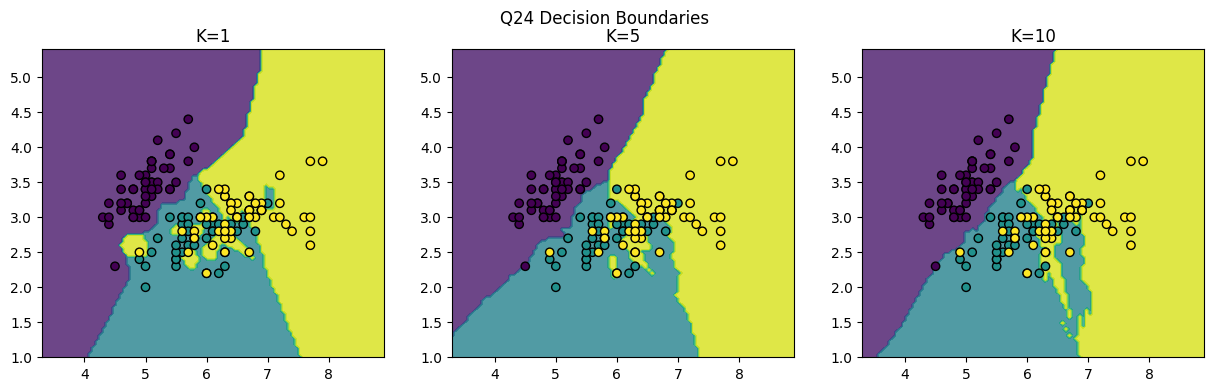

Q25 Scaled Accuracy: 1.0
Q25 Unscaled Accuracy: 1.0 

Q26 Explained Variance Ratios: [7.00684855e-01 2.99315145e-01 1.97446569e-16 1.14681903e-16] 

Q27 Accuracy with PCA: 0.7333333333333333
Q27 Accuracy without PCA: 1.0 

Q28 Best Parameters: {'n_neighbors': 7, 'weights': 'uniform'}
Q28 Best Accuracy: 0.780952380952381 

Q29 Misclassified Samples: 0 



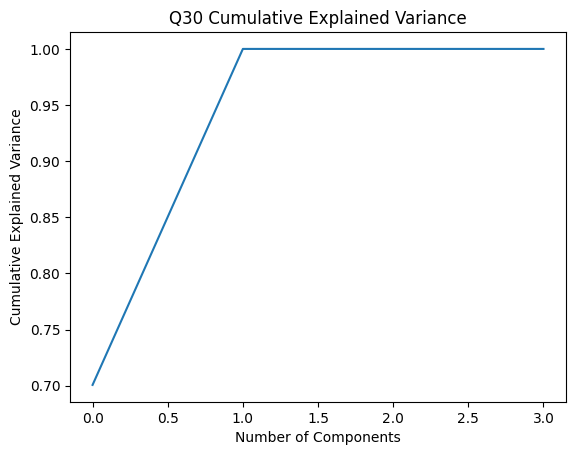

Q31 uniform Accuracy: 0.7777777777777778
Q31 distance Accuracy: 0.7555555555555555

Q32 k=1 MSE: 311.30638869789016
Q32 k=3 MSE: 280.67477914818227
Q32 k=5 MSE: 281.9495551412595

Q33 Original data with missing values:
 [[-0.79382063 -0.78331588 -0.19236096]
 [ 1.21524433  1.10091916  0.7870846 ]
 [        nan  0.8534947  -0.71435142]
 [ 0.80846457         nan -1.06230371]
 [ 0.64027585  0.88603341 -0.97468167]]
Q33 Imputed data:
 [[-0.79382063 -0.78331588 -0.19236096]
 [ 1.21524433  1.10091916  0.7870846 ]
 [-0.30162403  0.8534947  -0.71435142]
 [ 0.80846457 -0.32849311 -1.06230371]
 [ 0.64027585  0.88603341 -0.97468167]] 



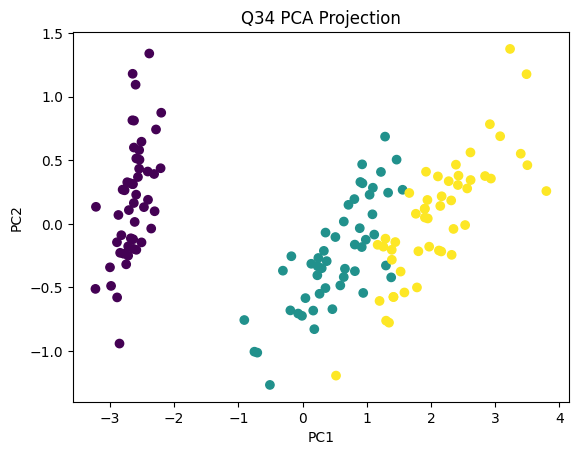

Q35 kd_tree Accuracy: 1.0
Q35 ball_tree Accuracy: 1.0



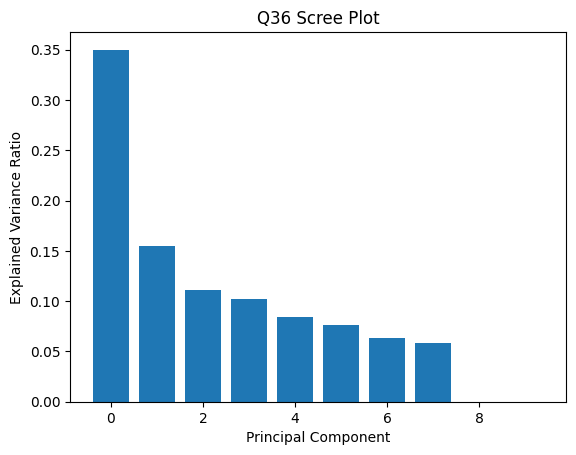

Q37 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Q38 Accuracy with 1 components: 0.9777777777777777
Q38 Accuracy with 2 components: 1.0
Q38 Accuracy with 3 components: 1.0

Q39 leaf_size=10 Accuracy: 1.0
Q39 leaf_size=30 Accuracy: 1.0
Q39 leaf_size=50 Accuracy: 1.0



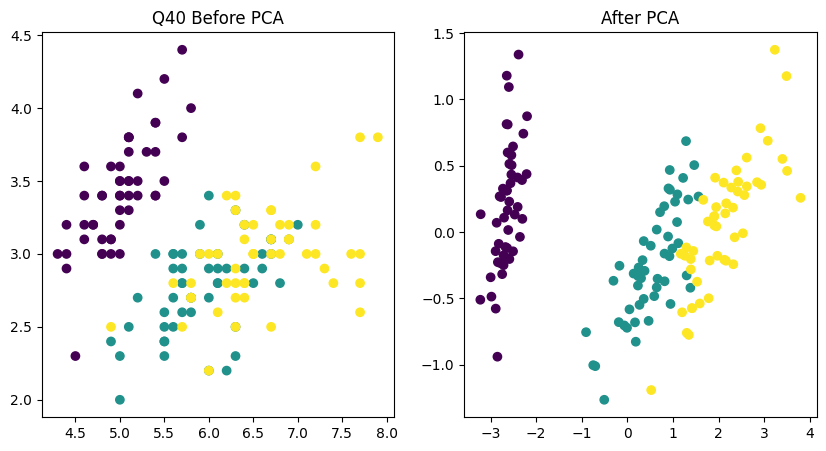

Q41 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54

Q42 euclidean MSE: 0.23259259259259257
Q42 manhattan MSE: 0.17629629629629628

Q43 ROC-AUC Score: 1.0 



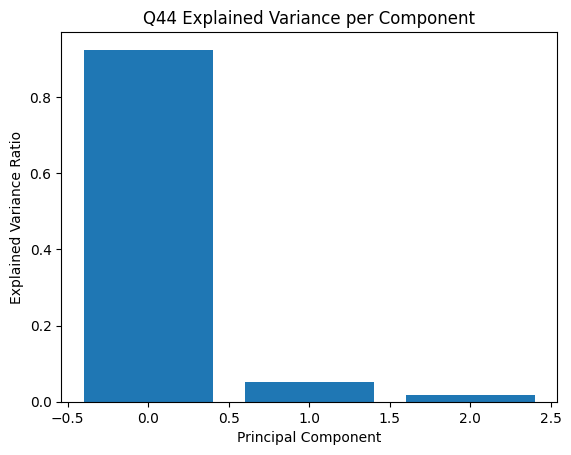

Q45 Accuracy after feature selection: 1.0 

Q46 Reconstruction Error: 0.02534107393239825 



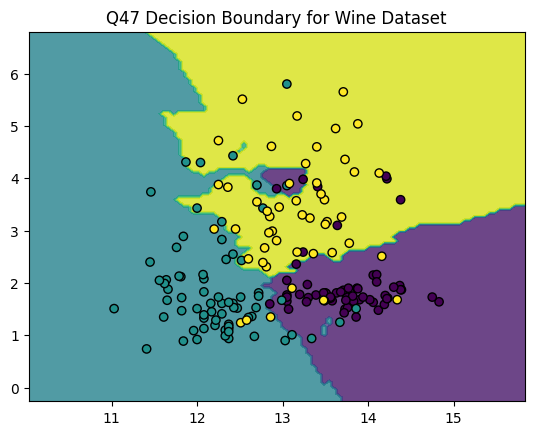

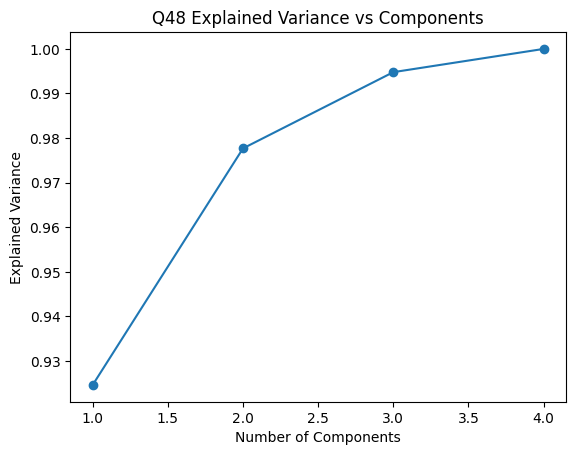

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import (accuracy_score, mean_squared_error, classification_report,
                             precision_recall_fscore_support, roc_auc_score)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.datasets import make_classification, make_regression

np.random.seed(42)

#--------------------------------------------------------------------------------------------------
# 21. Train a KNN Classifier on the Iris dataset and print model accuracy.
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Q21 Accuracy:", accuracy_score(y_test, y_pred), "\n")

#--------------------------------------------------------------------------------------------------
# 22. Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE).
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)
print("Q22 MSE:", mean_squared_error(y_test, y_pred), "\n")

#--------------------------------------------------------------------------------------------------
# 23. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy.
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
metrics = ['euclidean', 'manhattan']
for metric in metrics:
    knn = KNeighborsClassifier(metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"Q23 {metric} Accuracy:", accuracy_score(y_test, y_pred))
print()

#--------------------------------------------------------------------------------------------------
# 24. Train a KNN Classifier with different values of K and visualize decision boundaries.
# Using only first two features for visualization
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
k_values = [1, 5, 10]
plt.figure(figsize=(15, 4))
for i, k in enumerate(k_values):
    plt.subplot(1, 3, i+1)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # Create meshgrid
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.title(f'K={k}')
plt.suptitle("Q24 Decision Boundaries")
plt.show()

#--------------------------------------------------------------------------------------------------
# 25. Apply Feature Scaling before training a KNN model and compare results with unscaled data.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
print("Q25 Scaled Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Q25 Unscaled Accuracy:", accuracy_score(y_test, y_pred), "\n")

#--------------------------------------------------------------------------------------------------
# 26. Train a PCA model on synthetic data and print the explained variance ratio for each component.
X, _ = make_classification(n_samples=100, n_features=4, random_state=42)
pca = PCA()
pca.fit(X)
print("Q26 Explained Variance Ratios:", pca.explained_variance_ratio_, "\n")

#--------------------------------------------------------------------------------------------------
# 27. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA.
X_pca = pca.transform(iris.data)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca[:, :2], y, test_size=0.3, random_state=42)
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
print("Q27 Accuracy with PCA:", accuracy_score(y_test, y_pred_pca))
print("Q27 Accuracy without PCA:", accuracy_score(y_test, y_pred), "\n")

#--------------------------------------------------------------------------------------------------
# 28. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV.
param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=3)
grid.fit(X_train, y_train)
print("Q28 Best Parameters:", grid.best_params_)
print("Q28 Best Accuracy:", grid.best_score_, "\n")

#--------------------------------------------------------------------------------------------------
# 29. Train a KNN Classifier and check the number of misclassified samples.
misclassified = (y_test != y_pred).sum()
print("Q29 Misclassified Samples:", misclassified, "\n")

#--------------------------------------------------------------------------------------------------
# 30. Train a PCA model and visualize the cumulative explained variance.
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title("Q30 Cumulative Explained Variance")
plt.show()

#--------------------------------------------------------------------------------------------------
# 31. Train a KNN Classifier using different weights parameter (uniform vs. distance) and compare accuracy.
weights = ['uniform', 'distance']
for weight in weights:
    knn = KNeighborsClassifier(weights=weight)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"Q31 {weight} Accuracy:", accuracy_score(y_test, y_pred))
print()

#--------------------------------------------------------------------------------------------------
# 32. Train a KNN Regressor and analyze the effect of different K values on performance.
k_values = [1, 3, 5]
X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"Q32 k={k} MSE:", mean_squared_error(y_test, y_pred))
print()

#--------------------------------------------------------------------------------------------------
# 33. Implement KNN Imputation for handling missing values in a dataset.
X, _ = make_classification(
    n_samples=50,
    n_features=3,
    n_informative=2,
    n_redundant=0,
    random_state=42
)
mask = np.random.rand(*X.shape) < 0.1
X_missing = X.copy()
X_missing[mask] = np.nan
imputer = KNNImputer(n_neighbors=2)
X_imputed = imputer.fit_transform(X_missing)
print("Q33 Original data with missing values:\n", X_missing[:5])
print("Q33 Imputed data:\n", X_imputed[:5], "\n")

#--------------------------------------------------------------------------------------------------
# 34. Train a PCA model and visualize the data projection onto the first two principal components.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris.data)
plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], c=iris.target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Q34 PCA Projection")
plt.show()

#--------------------------------------------------------------------------------------------------
# 35. Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance.
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
algorithms = ['kd_tree', 'ball_tree']
for algo in algorithms:
    knn = KNeighborsClassifier(algorithm=algo)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"Q35 {algo} Accuracy:", accuracy_score(y_test, y_pred))
print()

#--------------------------------------------------------------------------------------------------
# 36. Train a PCA model on a high-dimensional dataset and visualize the Scree plot.
X, _ = make_classification(n_samples=100, n_features=10, random_state=42)
pca = PCA().fit(X)
plt.figure()
plt.bar(range(10), pca.explained_variance_ratio_)
plt.title("Q36 Scree Plot")
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

#--------------------------------------------------------------------------------------------------
# 37. Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score.
print("Q37 Classification Report:\n", classification_report(y_test, y_pred))

#--------------------------------------------------------------------------------------------------
# 38. Train a PCA model and analyze the effect of different numbers of components on accuracy.
n_components = [1, 2, 3]
for n in n_components:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(iris.data)
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
    knn = KNeighborsClassifier()
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)
    print(f"Q38 Accuracy with {n} components:", accuracy_score(y_test, y_pred))
print()

#--------------------------------------------------------------------------------------------------
# 39. Train a KNN Classifier with different leaf_size values and compare accuracy.
leaf_sizes = [10, 30, 50]
for leaf in leaf_sizes:
    knn = KNeighborsClassifier(leaf_size=leaf)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"Q39 leaf_size={leaf} Accuracy:", accuracy_score(y_test, y_pred))
print()

#--------------------------------------------------------------------------------------------------
# 40. Train a PCA model and visualize how data points are transformed before and after PCA.
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(iris.data[:,0], iris.data[:,1], c=iris.target)
plt.title("Q40 Before PCA")
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=iris.target)
plt.title("After PCA")
plt.show()

#--------------------------------------------------------------------------------------------------
# 41. Train a KNN Classifier on the Wine dataset and print classification report.
wine = datasets.load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Q41 Classification Report:\n", classification_report(y_test, y_pred))

#--------------------------------------------------------------------------------------------------
# 42. Train a KNN Regressor and analyze the effect of different distance metrics on prediction error.
metrics = ['euclidean', 'manhattan']
for metric in metrics:
    knn = KNeighborsRegressor(metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"Q42 {metric} MSE:", mean_squared_error(y_test, y_pred))
print()

#--------------------------------------------------------------------------------------------------
# 43. Train a KNN Classifier and evaluate using ROC-AUC score.
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_proba = knn.predict_proba(X_test)
print("Q43 ROC-AUC Score:", roc_auc_score(y_test, y_proba, multi_class='ovr'), "\n")

#--------------------------------------------------------------------------------------------------
# 44. Train a PCA model and visualize the variance captured by each principal component.
plt.figure()
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.title("Q44 Explained Variance per Component")
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

#--------------------------------------------------------------------------------------------------
# 45. Train a KNN Classifier and perform feature selection before training.
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=2)
X_new = selector.fit_transform(iris.data, y)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Q45 Accuracy after feature selection:", accuracy_score(y_test, y_pred), "\n")

#--------------------------------------------------------------------------------------------------
# 46. Train a PCA model and visualize the data reconstruction error after reducing dimensions.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris.data)
X_reconstructed = pca.inverse_transform(X_pca)
reconstruction_error = np.mean((iris.data - X_reconstructed) ** 2)
print("Q46 Reconstruction Error:", reconstruction_error, "\n")

#--------------------------------------------------------------------------------------------------
# 47. Train a KNN Classifier and visualize the decision boundary.
# Reusing code from Q24 with Wine dataset
X = wine.data[:, :2]
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
# Create meshgrid
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.title("Q47 Decision Boundary for Wine Dataset")
plt.show()

#--------------------------------------------------------------------------------------------------
# 48. Train a PCA model and analyze the effect of different numbers of components on data variance.
n_components = list(range(1, 5))
variances = []
for n in n_components:
    pca = PCA(n_components=n)
    pca.fit(iris.data)
    variances.append(np.sum(pca.explained_variance_ratio_))
plt.figure()
plt.plot(n_components, variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title("Q48 Explained Variance vs Components")
plt.show()